## Task10.1

In [8]:
import networkx as nx
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [3]:

G = nx.Graph()

ma_df = pd.read_csv('/Users/edu/Documents/compsoc/code/MA_cbg_human_mobility_2019/MA_cbg2cbg_2019_01.csv')
print(ma_df.columns, ma_df.shape)
ma_df.head()

for i in tqdm(range(len(ma_df))):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
#     print(origin_cbg, destination_cbg, percent_visitor)
    # add an edge/tie between two neighborhoods with weight being percentage of residents from one neighborhood visiting another
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
    # G.remove_edge(origin_cbg, destination_cbg) # removing edge

Index(['poi_cbg', 'year_month', 'raw_device_counts', 'visitor_census_tract',
       'visitor_count'],
      dtype='object') (840593, 5)


100%|████████████████████████████████| 840593/840593 [00:29<00:00, 28666.19it/s]


In [4]:
print(nx.info(G))

Graph with 40292 nodes and 742299 edges


/var/folders/0f/2vmn8gfj6v973sb5n_jhk8lc0000gn/T/ipykernel_98170/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


## Task10.2

In [5]:
weight_dict = G.degree
unweight_dict = G.degree(weight='weight')
df = pd.DataFrame(columns=["census id", "weight", "unweight"])
df["census id"] = G.nodes
weight_list = []
unweight_list = []
for i in G.nodes:
    weight_list.append(weight_dict[i])
    unweight_list.append(unweight_dict[i])
df["weight"] = weight_list
df["unweight"] = unweight_list

In [6]:
df

,census id,weight,unweight
250250303003,250250303003,2936,1.617298
250251010016,250251010016,609,1.829781
440070008003,440070008003,77,0.201907
250250923002,250250923002,600,2.675362
250173686001,250173686001,3217,1.763752
...,...,...,...
170318261003,170318261003,1,0.000726
120310144111,120310144111,1,0.000726
530330294073,530330294073,1,0.000726
360610165001,360610165001,1,0.000726


## Task10.3

In [12]:
import seaborn as sns
import math

In [13]:
node_df = df.reset_index()
del node_df["index"]

In [14]:
node_weight = node_df.groupby(['weight']).agg({'census id': 'count'}).reset_index()
node_weight["census id_log"] = list(map(math.log, node_weight["census id"]))
node_weight["weight_log"] = list(map(math.log, node_weight["weight"]))

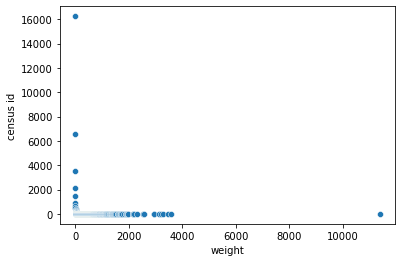

In [21]:
fig_0 = sns.scatterplot(data=node_weight, x='weight', y='census id')

according to the definition of scale free network, one significant condition is following the power law. as we can observe from the fig_0, as the weight level incerase in the network, the amount of the node decreased drastically. so the degree distribution did follow the power law "asymptotically".

(0.0, 100.0)

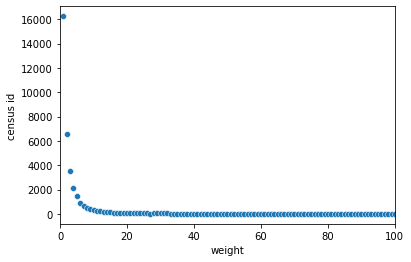

In [24]:
fig = sns.scatterplot(data=node_weight, x='weight', y='census id')
fig.set_xlim([0,100])

closer look between the [0,100] we could observe the transition.

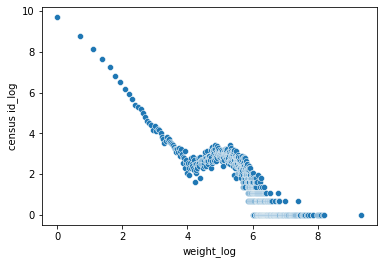

In [15]:
fig_2 = sns.scatterplot(data=node_weight, x="weight_log", y="census id_log")

the distribution of weight and node after decreasing power. 